# Ensemble : Boosting

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

C:\Users\allsa\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : XGB

In [38]:
# 모델 선언
model = XGBClassifier(n_estimators = 5,) #max_depth=2)

In [39]:
# 학습
model.fit(x_train, y_train)

[13:42:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
# 예측
pred = model.predict(x_val)

In [41]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       769
           1       0.67      0.72      0.70       731

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500



## 4.시각화와 변수중요도

### (1) 모델 시각화

xgboost 자체 plot_tree 함수를 제공합니다. 

* plot_tree(model, num_trees = 0)
    * num_trees : 전체 트리 5개짜리 모델이므로 각각 0~4까지 인덱스로 조회해 볼 수 있다.

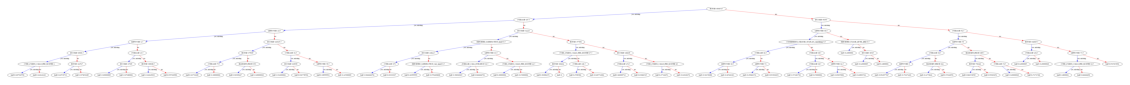

In [42]:
plt.rcParams['figure.figsize'] = 20,20
plot_tree(model, num_trees = 0)
plt.show()

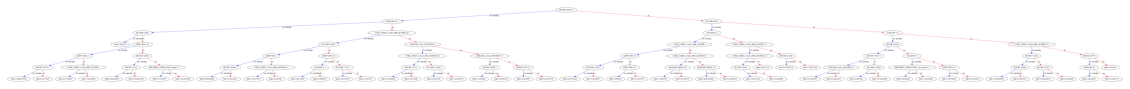

In [43]:
plot_tree(model, num_trees = 4)
plt.show()

### (2) 변수 중요도

In [44]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.04530415 0.12009237 0.19194081 0.11272172 0.13279922 0.06022841
 0.04685733 0.03811195 0.         0.04008486 0.         0.04205307
 0.         0.02807601 0.05156877 0.         0.0399426  0.
 0.05021862 0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [45]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

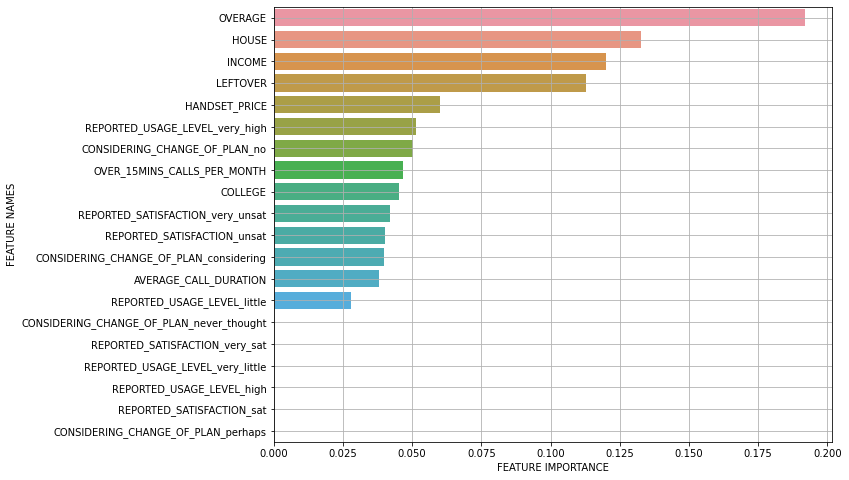

In [46]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습 : 튜닝
* xgboost에 대해 grid search로 튜닝을 수행해 봅시다.
    * cv = 5
    * grid 파라미터
        - max_depth : 3~8 사이에서 3개 선택
        - n_estimators : 50~150 사이에서 3개 선택
        - learning_rate :0.01~ 0.2 사이에서 3개 선택

In [48]:
from random import sample

model = XGBClassifier()

In [56]:
params = {'max_depth': sample(range(3,9), 3), 'n_estimators': sample(range(50, 151), 3), 'learning_rate': sample(list(np.linspace(0.01, 0.20, 20)), 3)}

In [57]:
model_gs = GridSearchCV(estimator=model, param_grid=params, cv = 5)

In [58]:
model_gs.fit(x_train, y_train)

[13:57:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:15] WARNING:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [59]:
model_gs.cv_results_

{'mean_fit_time': array([0.10090365, 0.15832405, 0.14223561, 0.04241862, 0.06647744,
        0.0590838 , 0.06535797, 0.11020002, 0.09630198, 0.11405344,
        0.16739268, 0.15981641, 0.04463916, 0.06921229, 0.06144795,
        0.07154508, 0.10959854, 0.09869561, 0.091294  , 0.15061874,
        0.1336493 , 0.0418314 , 0.07150111, 0.06650491, 0.06805139,
        0.10489678, 0.09145679]),
 'std_fit_time': array([0.00246171, 0.00633659, 0.00590203, 0.00137183, 0.00132261,
        0.00207311, 0.00118574, 0.00146957, 0.00316057, 0.00311986,
        0.00499319, 0.00278259, 0.00315993, 0.00203778, 0.00132143,
        0.00381351, 0.00206532, 0.00447297, 0.00111568, 0.00390513,
        0.00411405, 0.00411164, 0.00090263, 0.00139016, 0.00207506,
        0.00200775, 0.00129256]),
 'mean_score_time': array([0.00221591, 0.00219998, 0.00260005, 0.00219989, 0.00221615,
        0.00220857, 0.00180011, 0.002     , 0.00220041, 0.00240006,
        0.00219998, 0.00239987, 0.00200009, 0.00259995, 0.002600

In [60]:
model_gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=97, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
model_gs.best_index_

17

In [61]:
# 예측
pred = model_gs.predict(x_val)

In [62]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       769
           1       0.69      0.72      0.71       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



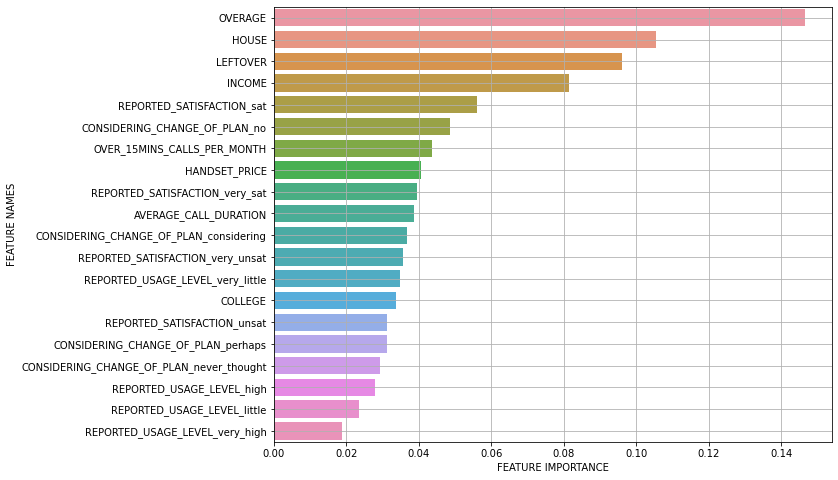

In [70]:
result = plot_feature_importance(model_gs.best_estimator_.feature_importances_, x_train.columns)

* 변수 중요도

## 6.하이퍼파라미터 변화에 따른 성능 추세

### (1) n_estimators
* 1~150까지 증가시켜가며 성능 추세 살펴보기

In [71]:
grid_param = {'n_estimators':range(1,200,2)}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 5)
model_gs.fit(x_train, y_train)

[14:09:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:16] WARNING:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [72]:
result = pd.DataFrame(model_gs.cv_results_)

In [73]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_n_estimators','mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,1,0.679714
1,3,0.675143
2,5,0.686571
3,7,0.686000
4,9,0.686857


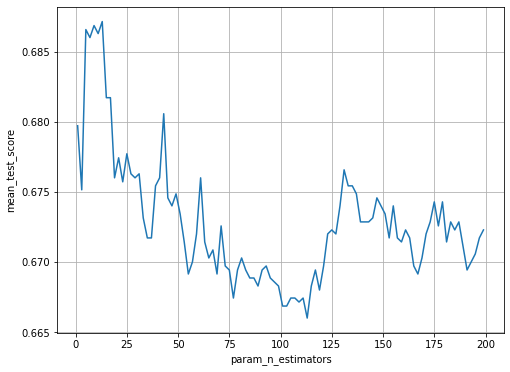

In [74]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = temp )
plt.grid()
plt.show()

### (2) learning rate
* 0.01 ~ 1까지 증가시켜가며 성능 추세 살펴보기

In [83]:
grid_param = {'learning_rate':np.linspace(0.01,1,100)}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 5)
model_gs.fit(x_train, y_train)

[14:11:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:40] WARNING:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65

In [76]:
result = pd.DataFrame(model_gs.cv_results_)

In [77]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_learning_rate','mean_test_score']]
temp.head()

,param_learning_rate,mean_test_score
0,0.01,0.678857
1,0.02,0.687143
2,0.03,0.685714
3,0.04,0.685143
4,0.05,0.684000


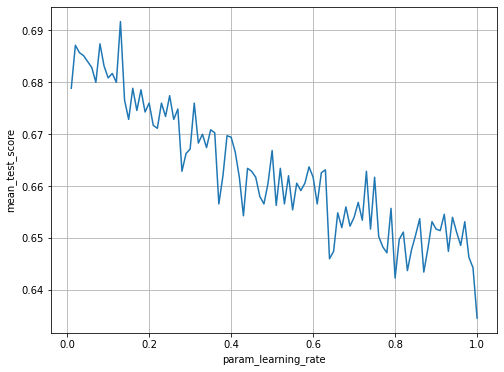

In [78]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = temp )
plt.grid()
plt.show()

### (3) n_estimators + learning rate
* 이번에는 두 하이퍼파라미터를 동시에 조절하며 추세를 살펴보겠습니다.
* n_estimators : 30, 50, 100, 150
* learning_rate : 0.05 ~ 0.3까지 0.01씩 증가

In [79]:
grid_param = {'learning_rate':np.linspace(0.01,0.5,30),
              'n_estimators':[30,50,100,150]}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 5)
model_gs.fit(x_train, y_train)

[14:11:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:24] WARNING:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
             param_grid={'learning_rate': array([0.01      , 0.02689655, 0.0437931 , 0.06068966, 0.07758621,
       0.09448276, 0.11137931, 0.12827586, 0.14517241, 0.16206897,
       0.17896552, 0.19586207, 0.21275862, 0.22965517, 0.24655172,
       0.26344828, 0.28034483, 0.29724138

In [80]:
result = pd.DataFrame(model_gs.cv_results_)

In [81]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_n_estimators', 'param_learning_rate','mean_test_score']]
temp.head()

,param_n_estimators,param_learning_rate,mean_test_score
0,30,0.01,0.687143
1,50,0.01,0.680857
2,100,0.01,0.678857
3,150,0.01,0.684571
4,30,0.026897,0.678571


In [93]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (10,8))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = temp, hue = 'param_n_estimators')
plt.grid()
plt.show()

ValueError: Could not interpret value `param_n_estimators` for parameter `hue`

<Figure size 720x576 with 0 Axes>

In [89]:
grid_param = {'learning_rate':np.linspace(0.001,0.3,300), 'n_estimators':[20,30,50,100]}
model = XGBClassifier(eval_metric='logloss')
model_gs = GridSearchCV(model, grid_param, cv = 5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
       0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 0.25 , 0.251, 0.252,
       0.253, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26 , 0.261,
       0.262, 0.263, 0.264, 0.265, 0.266, 0.267, 0.268, 0.269, 0.27 ,
       0.271, 0.272, 0.273, 0.274, 0

In [99]:
result = pd.DataFrame(model_gs.cv_results_)

In [101]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_learning_rate','param_n_estimators', 'mean_test_score']]
temp.head()

,param_learning_rate,param_n_estimators,mean_test_score
0,0.001,20,0.681143
1,0.001,30,0.680571
2,0.001,50,0.681143
3,0.001,100,0.681714
4,0.002,20,0.681143


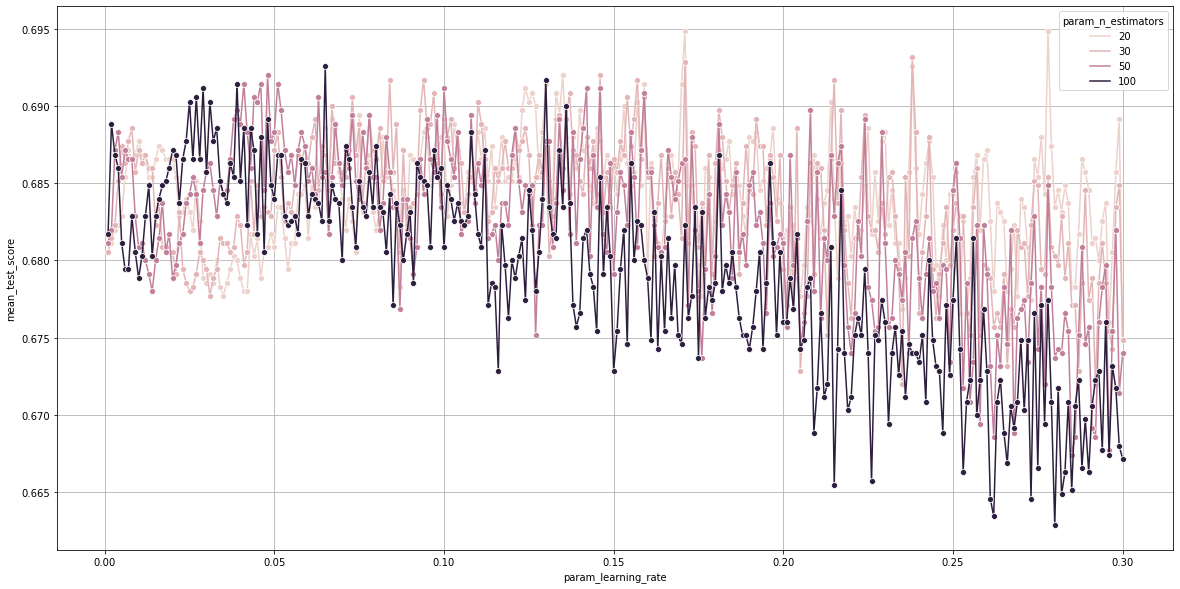

In [109]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (20,10))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = temp, hue='param_n_estimators', marker='o')
plt.grid()
plt.show()